## Library , mount 

In [ ]:
!pip install deepface

In [ ]:
#데이터 처리 관련 라이브러리 .
import os
import cv2 
import numpy as np 
import matplotlib.pyplot as plt

import tensorflow as tf
import pickle 

from tensorflow.keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img

from sklearn.model_selection import train_test_split

# 모델관련 라이브러리 . 
from tensorflow.keras.layers import Convolution2D, ZeroPadding2D, MaxPooling2D, Flatten, Activation, Dropout
from tensorflow.keras import layers
from tensorflow.keras import Sequential
from tensorflow.keras import Model


from tensorflow.keras.optimizers import Adam


from tensorflow.keras import models
from tensorflow.keras.models import save_model

In [ ]:
#gdrive mount . 
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import deepface

In [ ]:
import pickle
import pandas as pd
from tqdm.notebook import tqdm

In [ ]:
%run /content/drive/MyDrive/model_weigth/Facenet.py

<Figure size 432x288 with 0 Axes>

In [ ]:
#구현하려는 모델에 맞는 target size 미리 지정한다. 

target_size = (480, 480)

## 데이터 불러오기 

### 일반 이미지 


In [ ]:
# 성공한 사진들 가지고 오기 . 
suc_ = os.listdir("/content/drive/MyDrive/CV/Suc")

# 실패한 사진들 가지고 오기 
fail_ = os.listdir("/content/drive/MyDrive/CV/Fail")

In [ ]:
# suc 총 개수 , # fail 총 개수 
len(suc_), len(fail_)

(910, 699)

In [ ]:
temp_x = []
for i in range(len(suc_)):
  path = "/content/drive/MyDrive/CV/Suc/" + suc_[i]
  img = load_img(path, target_size=target_size)
  img = img_to_array(img)
  temp_x.append(img)

for j in range(len(fail_)):
  path = "/content/drive/MyDrive/CV/Fail/" + fail_[j]
  img = load_img(path, target_size=target_size)
  img = img_to_array(img)
  temp_x.append(img)


train_x = np.array(temp_x)



In [ ]:
#y label 추가해서 만들기. 
y = [] 
for _ in range(len(suc_)):
  y.append(1)
for _ in range(len(fail_)):
  y.append(0)

train_y = np.array(y)

In [ ]:
#모델의 모양 확인. 
train_x.shape, train_y.shape

((1609, 160, 160, 3), (1609,))

In [ ]:
#데이터 split 나중에 추가 확인. 
x_train, x_test, y_train, y_test = train_test_split(train_x, train_y, test_size = 0.2)

### 일반 이미지 그레이 스케일 

In [ ]:
df = pd.read_pickle("/content/drive/MyDrive/Landmark_ch1/grey_scale_img_160.pickle")
df

,img,label
0,"[[[35.0], [35.0], [36.0], [36.0], [36.0], [36....",1
1,"[[[41.0], [42.0], [42.0], [44.0], [46.0], [47....",1
2,"[[[43.0], [45.0], [38.0], [37.0], [30.0], [29....",1
3,"[[[127.0], [128.0], [127.0], [126.0], [126.0],...",1
4,"[[[80.0], [82.0], [84.0], [86.0], [88.0], [90....",1
...,...,...
1604,"[[[30.0], [30.0], [30.0], [30.0], [30.0], [30....",0
1605,"[[[55.0], [54.0], [54.0], [53.0], [53.0], [52....",0
1606,"[[[190.0], [190.0], [190.0], [190.0], [189.0],...",0
1607,"[[[56.0], [56.0], [56.0], [56.0], [56.0], [56....",0


In [ ]:
train_x = []
for i in df['img']:
    train_x.append(i)
    
train_x = np.array(train_x)
train_x.shape

(1609, 160, 160, 1)

In [ ]:
train_y = []
for j in df['label']:
    train_y.append(j)

train_y = np.array(train_y)
train_y.shape

(1609,)

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(train_x, train_y, test_size = 0.2)

### 랜드마크 이미지 데이터셋 생성 

In [ ]:
# 랜드마크 이미지 로드해서 합치든, 다시 만든다. 
# 성공한 사진들 가지고 오기 . 
suc_1 = os.listdir("/content/drive/MyDrive/CV/landmark/Suc")

# 실패한 사진들 가지고 오기 
fail_1 = os.listdir("/content/drive/MyDrive/CV/landmark/Fail")

temp_x = []
for i in range(len(suc_1)):
  path = "/content/drive/MyDrive/CV/landmark/Suc/" + suc_1[i]
  img = load_img(path, target_size=target_size)
  img = img_to_array(img)
  temp_x.append(img)

for j in range(len(fail_1)):
  path = "/content/drive/MyDrive/CV/landmark/Fail/" + fail_1[j]
  img = load_img(path, target_size=target_size)
  img = img_to_array(img)
  temp_x.append(img)


train_x_landmark = np.array(temp_x)



#y label 추가해서 만들기. 


In [ ]:
y = [] 
for _ in range(len(suc_1)):
  y.append(1)
for _ in range(len(fail_1)):
  y.append(0)

train_y_landmark = np.array(y)

In [ ]:
img = cv2.imread("/content/drive/MyDrive/Landmark/Fail/0.png")
img.shape

(480, 480, 3)

In [ ]:
train_x_landmark.shape, train_y_landmark.shape

((1608, 480, 480, 3), (1608,))

In [ ]:
x_train_landmark, x_test_landmark, y_train_landmark, y_test_landmark = train_test_split(train_x_landmark, train_y_landmark, test_size = 0.2)

### 사진 + 랜드마크 데이터 셋 만들기

In [ ]:
df = pd.read_pickle("/content/drive/MyDrive/Landmark_image_sum/sum2.pickle")
df

,img,arr,label
0,"[[[34.0, 35.0, 34.0], [35.0, 35.0, 35.0], [36....","[[[0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0,...",1
1,"[[[30.0, 45.0, 49.0], [32.0, 46.0, 49.0], [34....","[[[0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0,...",1
2,"[[[42.0, 43.0, 49.0], [47.0, 44.0, 42.0], [41....","[[[0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0,...",1
3,"[[[125.0, 125.0, 146.0], [124.0, 126.0, 146.0]...","[[[0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0,...",1
4,"[[[94.0, 76.0, 68.0], [95.0, 77.0, 72.0], [94....","[[[0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0,...",1
...,...,...,...
1604,"[[[37.0, 26.0, 35.0], [37.0, 26.0, 35.0], [37....","[[[0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0,...",0
1605,"[[[63.0, 49.0, 61.0], [60.0, 49.0, 60.0], [60....","[[[0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0,...",0
1606,"[[[255.0, 161.0, 165.0], [255.0, 161.0, 165.0]...","[[[0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0,...",0
1607,"[[[77.0, 47.0, 50.0], [77.0, 47.0, 50.0], [77....","[[[0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0,...",0


<function matplotlib.pyplot.show(close=None, block=None)>

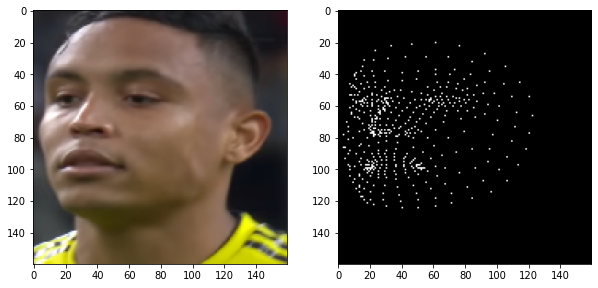

In [ ]:
plt.figure(figsize = (10,10))
plt.subplot(1,2,1)
plt.imshow(df['img'][333].astype('uint8'))
plt.subplot(1,2,2)
plt.imshow(df['arr'][333].astype('uint8'))
plt.show

In [ ]:
t1 = np.concatenate((df['img'][0] ,df['arr'][0]), axis = -1)
t1.shape

(160, 160, 6)

In [ ]:
temp_x = []
for i in tqdm(range(len(df['img']))):
    try:
        t1 = np.concatenate((df['img'][i] ,df['arr'][i]), axis = -1)
        temp_x.append(t1)
    except:
        tmp = df['arr'][i]
        tmp = np.stack((tmp,)*3, axis=-1)
        t1 = np.concatenate((df['img'][i] ,tmp), axis = -1)
        temp_x.append(t1)
train_x_land_img = np.array(temp_x)
train_x_land_img.shape

  0%|          | 0/1609 [00:00<?, ?it/s]

(1609, 160, 160, 6)

In [ ]:
temp_y = df['label']
train_y_land_img = np.array(temp_y)
train_y_land_img.shape

(1609,)

In [ ]:
#데이터 split 나중에 추가 확인. 
x_train_land_img, x_test_land_img, y_train_land_img, y_test_land_img = train_test_split(train_x_land_img, train_y_land_img, test_size = 0.2)

## 모델 빌드

### 기존 모델 빌드하기

In [ ]:
model = InceptionResNetV2()

In [ ]:
#facenet_model weight 가져오기
model.load_weights("/content/drive/MyDrive/model_weigth/facenet_weights.h5")

In [ ]:
#새롭게 pre_train 모델을 전이 학습하기 위해 학습시키고 싶은 layer를 지정한다. 

for layer in model.layers[:-8]:
    layer.trainable = False


# 새로운 own model을 빌드한다. 현재 -4 이후의 결과 == Fully connect layer 만 을 새롭게 빌드. 
base_model_output = Sequential()
base_model_output = Convolution2D(2, (2, 2), name='predictions')(model.layers[-5].output)
base_model_output = Convolution2D(2, (2, 2), name='predictions1')(base_model_output)

base_model_output = Flatten()(base_model_output)
base_model_output = Activation('softmax')(base_model_output)
 
soccer_model = Model(inputs=model.input, outputs=base_model_output)

In [ ]:
# 모델 컴파일 현재 성공 실패를 원핫 인코딩안하고 있으니까 sparse categorical로 진행. 
soccer_model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


In [ ]:
tf.config.experimental_run_functions_eagerly(True)


Instructions for updating:
Use `tf.config.run_functions_eagerly` instead of the experimental version.


In [ ]:
es = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=5,
    verbose=0,
    restore_best_weights=True,
    start_from_epoch=0
)

In [ ]:
tf.keras.callbacks.History()

In [ ]:
histo   ry = soccer_model.fit(x_train, y_train, validation_split=0.1, callbacks=[es], epochs= 20)

Epoch 1/20


/usr/local/lib/python3.9/dist-packages/tensorflow/python/data/ops/structured_function.py:256: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


37/37 [==============================] - 348s 9s/step - loss: 0.9501 - accuracy: 0.5794 - val_loss: 0.7655 - val_accuracy: 0.5969
Epoch 2/20
37/37 [==============================] - 348s 9s/step - loss: 0.6102 - accuracy: 0.7193 - val_loss: 0.7131 - val_accuracy: 0.6667
Epoch 3/20
37/37 [==============================] - 353s 10s/step - loss: 0.3929 - accuracy: 0.8273 - val_loss: 0.8678 - val_accuracy: 0.5891
Epoch 4/20
37/37 [==============================] - 351s 10s/step - loss: 0.3543 - accuracy: 0.8394 - val_loss: 0.6406 - val_accuracy: 0.7442
Epoch 5/20
37/37 [==============================] - 357s 10s/step - loss: 0.2303 - accuracy: 0.9162 - val_loss: 0.6322 - val_accuracy: 0.7209
Epoch 6/20
37/37 [==============================] - 350s 9s/step - loss: 0.1883 - accuracy: 0.9465 - val_loss: 0.6819 - val_accuracy: 0.7054
Epoch 7/20
37/37 [==============================] - 351s 10s/step - loss: 0.1424 - accuracy: 0.9663 - val_loss: 0.7213 - val_accuracy: 0.7132
Epoch 8/20
37/37 [==

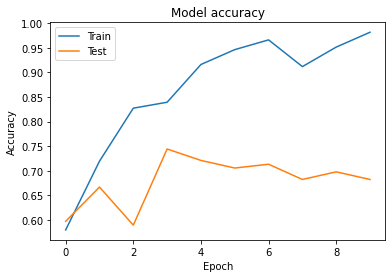

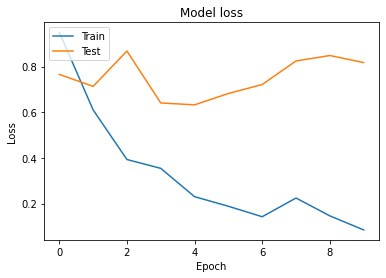

In [ ]:
# 6 훈련 과정 시각화 (정확도)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# 7 훈련 과정 시각화 (손실)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [ ]:
soccer_model.evaluate(x_test, y_test)

11/11 [==============================] - 25s 2s/step - loss: 0.6593 - accuracy: 0.7391


[0.6593363881111145, 0.739130437374115]

In [ ]:
from sklearn.metrics import classification_report

y_pred = soccer_model.predict(x_test) #모델만 변경

y_preds = []
for i in y_pred:
    y_preds.append(np.argmax(i))

name = ['0', '1']

print(classification_report(y_test, y_preds, target_names=name))

/usr/local/lib/python3.9/dist-packages/tensorflow/python/data/ops/structured_function.py:256: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


11/11 [==============================] - 24s 2s/step
              precision    recall  f1-score   support

           0       0.77      0.58      0.66       142
           1       0.72      0.87      0.79       180

    accuracy                           0.74       322
   macro avg       0.75      0.72      0.72       322
weighted avg       0.74      0.74      0.73       322



In [ ]:
#모델 저장 원하는 방식대로 

save_model(soccer_model, "/content/drive/MyDrive/model_resnet")

### 그레이스킬 이미지 + 기존 모델

In [ ]:
%run /content/drive/MyDrive/model_weigth/Facenet2.py

<Figure size 432x288 with 0 Axes>

In [ ]:
model = InceptionResNetV2(dimension = 2)

In [ ]:
# 모델 컴파일 현재 성공 실패를 원핫 인코딩안하고 있으니까 sparse categorical로 진행. 
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


In [ ]:
history = model.fit(x_train, y_train, validation_split=0.1 ,callbacks=[es], epochs= 100)

Epoch 1/100
37/37 [==============================] - 51s 243ms/step - loss: 1.0886 - accuracy: 0.5233 - val_loss: 0.6931 - val_accuracy: 0.5271
Epoch 2/100
37/37 [==============================] - 6s 149ms/step - loss: 0.8782 - accuracy: 0.5130 - val_loss: 0.6931 - val_accuracy: 0.5271
Epoch 3/100
37/37 [==============================] - 5s 148ms/step - loss: 0.8042 - accuracy: 0.5250 - val_loss: 0.6931 - val_accuracy: 0.5271
Epoch 4/100
37/37 [==============================] - 5s 147ms/step - loss: 0.7559 - accuracy: 0.4680 - val_loss: 0.6931 - val_accuracy: 0.5271
Epoch 5/100
37/37 [==============================] - 5s 146ms/step - loss: 0.7140 - accuracy: 0.5121 - val_loss: 0.7838 - val_accuracy: 0.4961
Epoch 6/100
37/37 [==============================] - 6s 151ms/step - loss: 0.8302 - accuracy: 0.4879 - val_loss: 0.6914 - val_accuracy: 0.4651
Epoch 7/100
37/37 [==============================] - 5s 146ms/step - loss: 0.7676 - accuracy: 0.4957 - val_loss: 0.6937 - val_accuracy: 0.511

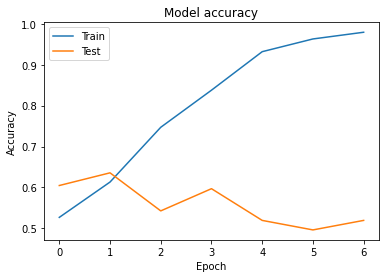

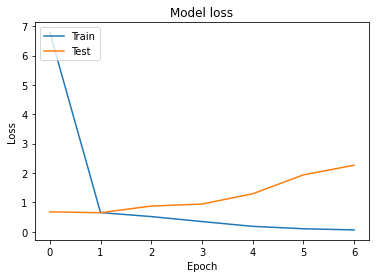

In [ ]:
# 6 훈련 과정 시각화 (정확도)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# 7 훈련 과정 시각화 (손실)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [ ]:
model.evaluate(x_test, y_test)

11/11 [==============================] - 1s 84ms/step - loss: 0.7316 - accuracy: 0.4503


[0.7316159009933472, 0.4503105580806732]

In [ ]:
from sklearn.metrics import classification_report

y_pred = model.predict(x_test) #모델만 변경

y_preds = []
for i in y_pred:
    y_preds.append(np.argmax(i))

name = ['0', '1']

print(classification_report(y_test, y_preds, target_names=name))

11/11 [==============================] - 2s 47ms/step
              precision    recall  f1-score   support

           0       0.44      0.92      0.59       140
           1       0.59      0.09      0.15       182

    accuracy                           0.45       322
   macro avg       0.51      0.50      0.37       322
weighted avg       0.53      0.45      0.34       322



#### 실제 예시하나 봐보기 

In [ ]:
img = load_img("/content/ㄴㅇㅁㅇ.png", target_size=target_size)
img = img_to_array(img)

In [ ]:
img.shape

(160, 160, 3)

In [ ]:
temp = img.reshape(1,160,160,3)

In [ ]:
soccer_model.predict(temp)

1/1 [==============================] - 1s 1s/step


array([[0.3403487 , 0.65965134]], dtype=float32)

### 모델 landmark 만 돌릴 모델 

In [ ]:
soccer_model_landmark = Model(inputs=model.input, outputs=base_model_output) 

In [ ]:
soccer_model_landmark.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


In [ ]:
history = soccer_model_landmark.fit(x_train_landmark, y_train_landmark, validation_split=0.1, callbacks=[es], epochs= 20)

Epoch 1/20
37/37 [==============================] - 86s 2s/step - loss: 1.2203 - accuracy: 0.5285 - val_loss: 1.2475 - val_accuracy: 0.4109
Epoch 2/20
37/37 [==============================] - 75s 2s/step - loss: 0.7576 - accuracy: 0.5813 - val_loss: 0.8049 - val_accuracy: 0.5271
Epoch 3/20
37/37 [==============================] - 71s 2s/step - loss: 0.6238 - accuracy: 0.6696 - val_loss: 0.8698 - val_accuracy: 0.6124
Epoch 4/20
37/37 [==============================] - 73s 2s/step - loss: 0.6681 - accuracy: 0.6436 - val_loss: 0.8555 - val_accuracy: 0.5116
Epoch 5/20
37/37 [==============================] - 73s 2s/step - loss: 0.5443 - accuracy: 0.7128 - val_loss: 0.8344 - val_accuracy: 0.5271
Epoch 6/20
37/37 [==============================] - 73s 2s/step - loss: 0.5026 - accuracy: 0.7526 - val_loss: 0.9195 - val_accuracy: 0.4884
Epoch 7/20
37/37 [==============================] - 73s 2s/step - loss: 0.4627 - accuracy: 0.7682 - val_loss: 1.0253 - val_accuracy: 0.4651


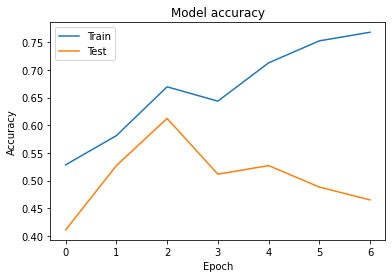

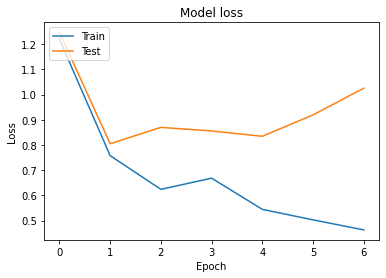

In [ ]:
# 6 훈련 과정 시각화 (정확도)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# 7 훈련 과정 시각화 (손실)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [ ]:
soccer_model_landmark = models.load_model( "/content/drive/MyDrive/model_resnet_landmark")

In [ ]:
soccer_model_landmark.evaluate(x_test_landmark, y_test_landmark)

11/11 [==============================] - 20s 2s/step - loss: 0.7542 - accuracy: 0.5217


[0.7542157173156738, 0.52173912525177]

In [ ]:
from sklearn.metrics import classification_report

y_pred = soccer_model_landmark.predict(x_test_landmark) #모델만 변경

y_preds = []
for i in y_pred:
    y_preds.append(np.argmax(i))

name = ['0', '1']

print(classification_report(y_test_landmark, y_preds, target_names=name))

11/11 [==============================] - 19s 2s/step
              precision    recall  f1-score   support

           0       0.46      0.46      0.46       142
           1       0.57      0.57      0.57       180

    accuracy                           0.52       322
   macro avg       0.51      0.51      0.51       322
weighted avg       0.52      0.52      0.52       322



In [ ]:
#모델 저장 원하는 방식대로 

save_model(soccer_model_landmark, "/content/drive/MyDrive/model_resnet_landmark")

### 모델 landmark + 기존 feature concat


In [ ]:
%run /content/drive/MyDrive/model_weigth/Facenet1.py

<Figure size 432x288 with 0 Axes>

In [ ]:
model2 = InceptionResNetV2(dimension = 2)

In [ ]:
model2.summary()

In [ ]:
model2.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


In [ ]:
history = model2.fit(x_train_land_img, y_train_land_img, batch_size=8, validation_split=0.1, epochs= 100)

Epoch 1/100
145/145 [==============================] - 53s 93ms/step - loss: 1.1789 - accuracy: 0.4948 - val_loss: 0.6931 - val_accuracy: 0.5814
Epoch 2/100
145/145 [==============================] - 12s 81ms/step - loss: 0.9088 - accuracy: 0.5017 - val_loss: 0.6931 - val_accuracy: 0.6124
Epoch 3/100
145/145 [==============================] - 12s 79ms/step - loss: 0.8488 - accuracy: 0.5363 - val_loss: 0.6916 - val_accuracy: 0.4186
Epoch 4/100
145/145 [==============================] - 12s 82ms/step - loss: 0.7776 - accuracy: 0.5147 - val_loss: 0.6932 - val_accuracy: 0.4651
Epoch 5/100
145/145 [==============================] - 12s 81ms/step - loss: 0.7817 - accuracy: 0.4888 - val_loss: 0.6931 - val_accuracy: 0.5814
Epoch 6/100
145/145 [==============================] - 12s 82ms/step - loss: 0.7131 - accuracy: 0.4974 - val_loss: 0.6925 - val_accuracy: 0.5814
Epoch 7/100
145/145 [==============================] - 12s 80ms/step - loss: 0.7230 - accuracy: 0.5259 - val_loss: 0.6906 - val_ac

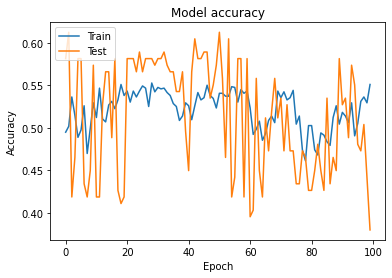

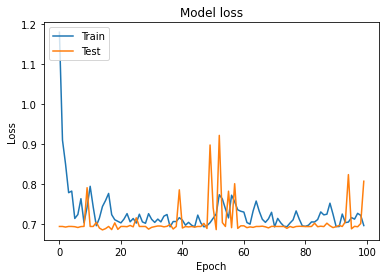

In [ ]:
# 6 훈련 과정 시각화 (정확도)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# 7 훈련 과정 시각화 (손실)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [ ]:
model2.evaluate(x_test_land_img, y_test_land_img)

11/11 [==============================] - 0s 42ms/step - loss: 0.8158 - accuracy: 0.4099


[0.8158108592033386, 0.40993788838386536]

In [ ]:
from sklearn.metrics import classification_report

y_pred = model2.predict(x_test_land_img) #모델만 변경

y_preds = []
for i in y_pred:
    y_preds.append(np.argmax(i))

name = ['0', '1']

print(classification_report(y_test_land_img, y_preds, target_names=name))

11/11 [==============================] - 2s 47ms/step
              precision    recall  f1-score   support

           0       0.40      0.95      0.57       131
           1       0.53      0.04      0.08       191

    accuracy                           0.41       322
   macro avg       0.47      0.49      0.32       322
weighted avg       0.48      0.41      0.28       322



## 가벼운 CNN model build

In [ ]:
from tensorflow.python.ops.gen_nn_ops import Conv2D
model5 = Sequential()

model5.add(layers.Conv2D(64,(3,3), activation = 'relu', padding ='same' ,input_shape = (480,480,1)))
model5.add(layers.MaxPooling2D(2,2))
model5.add(layers.Conv2D(128,(3,3), activation = 'relu', padding = 'same'))
model5.add(layers.MaxPooling2D(2,2))
model5.add(layers.Conv2D(256,(3,3), activation = 'relu', padding = 'same'))
model5.add(layers.MaxPooling2D(2,2))
model5.add(layers.Conv2D(256,(3,3), activation = 'relu', padding = 'same'))
model5.add(layers.MaxPooling2D(2,2))
model5.add(layers.Conv2D(512,(4,4), activation = 'relu'))

model5.add(layers.Flatten())
model5.add(layers.Dense(64, activation = 'relu'))
model5.add(layers.Dense(2, activation = 'softmax'))



In [ ]:
model5.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
import pickle 
import pandas as pd

df = pd.read_pickle('/content/drive/MyDrive/Landmark_ch1/grey_scale.pickle')
df

,arr,label
0,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",1
1,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",1
2,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",1
3,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",1
4,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",1
...,...,...
1604,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",0
1605,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",0
1606,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",0
1607,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",0


In [ ]:
train_x = []
for i in df['arr']:
    temp = i.reshape(480,480,1)
    train_x.append(temp)
    
train_x = np.array(train_x)
train_x.shape

(1609, 480, 480, 1)

In [ ]:
train_y = []
for j in df['label']:
    train_y.append(j)

train_y = np.array(train_y)
train_y.shape

(1609,)

In [ ]:
x_train_landmark, x_test_landmark, y_train_landmark, y_test_landmark = train_test_split(train_x, train_y, test_size = 0.2)

In [ ]:
history = model5.fit(x_train_landmark, y_train_landmark, validation_split=0.1, batch_size = 16 ,callbacks=[es], epochs= 30)

Epoch 1/30
73/73 [==============================] - 37s 298ms/step - loss: 6.7972 - accuracy: 0.5268 - val_loss: 0.6763 - val_accuracy: 0.6047
Epoch 2/30
73/73 [==============================] - 19s 258ms/step - loss: 0.6506 - accuracy: 0.6131 - val_loss: 0.6455 - val_accuracy: 0.6357
Epoch 3/30
73/73 [==============================] - 19s 262ms/step - loss: 0.5144 - accuracy: 0.7470 - val_loss: 0.8731 - val_accuracy: 0.5426
Epoch 4/30
73/73 [==============================] - 19s 265ms/step - loss: 0.3448 - accuracy: 0.8377 - val_loss: 0.9409 - val_accuracy: 0.5969
Epoch 5/30
73/73 [==============================] - 19s 262ms/step - loss: 0.1815 - accuracy: 0.9318 - val_loss: 1.2915 - val_accuracy: 0.5194
Epoch 6/30
73/73 [==============================] - 19s 260ms/step - loss: 0.0995 - accuracy: 0.9629 - val_loss: 1.9366 - val_accuracy: 0.4961
Epoch 7/30
73/73 [==============================] - 19s 262ms/step - loss: 0.0598 - accuracy: 0.9793 - val_loss: 2.2641 - val_accuracy: 0.5194

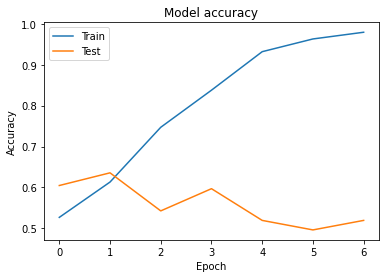

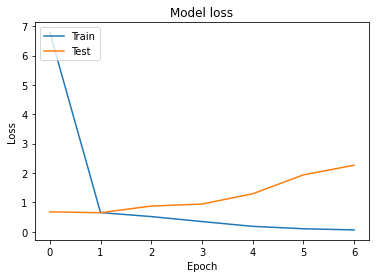

In [ ]:
# 6 훈련 과정 시각화 (정확도)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# 7 훈련 과정 시각화 (손실)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [ ]:
model5.evaluate(x_test_landmark, y_test_landmark)

11/11 [==============================] - 4s 166ms/step - loss: 0.7442 - accuracy: 0.5590


[0.7442049980163574, 0.5590062141418457]

In [ ]:
from sklearn.metrics import classification_report

y_pred = model5.predict(x_test_landmark) #모델만 변경

y_preds = []
for i in y_pred:
    y_preds.append(np.argmax(i))

name = ['0', '1']

print(classification_report(y_test_landmark, y_preds, target_names=name))

11/11 [==============================] - 1s 127ms/step
              precision    recall  f1-score   support

           0       0.49      0.38      0.43       139
           1       0.60      0.69      0.64       183

    accuracy                           0.56       322
   macro avg       0.54      0.54      0.53       322
weighted avg       0.55      0.56      0.55       322

